<a href="https://colab.research.google.com/github/kabirgoyal26/E-N-E-R-G-Y/blob/main/ENERGY_CONSUMPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

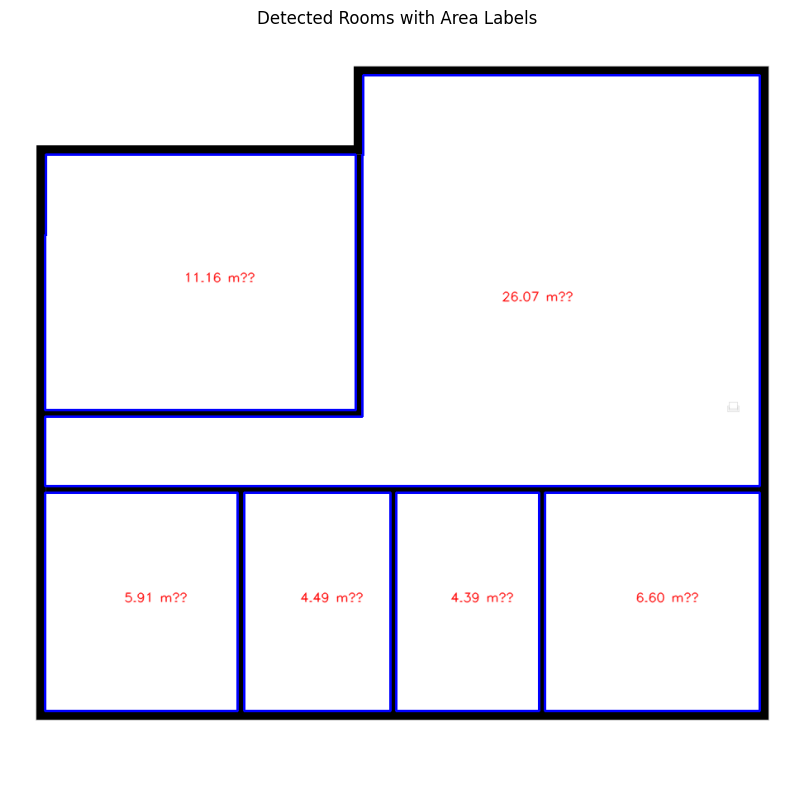

Room 1: 6.60 m²
Room 2: 4.39 m²
Room 3: 4.49 m²
Room 4: 5.91 m²
Room 5: 11.16 m²
Room 6: 26.07 m²


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "floorplan.png"  # Update with your image path
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Apply morphological closing to close small gaps in walls
kernel = np.ones((5,5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Find contours with hierarchy
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Define scale (1 meter = 50 pixels)
scale_factor = (1 / 102) ** 2  # Convert from pixel area to square meters

# Filter out only inner room contours (ignore the outermost boundary)
room_contours = [cnt for i, cnt in enumerate(contours) if hierarchy[0][i][3] != -1]

# Create a copy to draw on
image_with_rooms = image.copy()

# Initialize list for area labels
room_areas_sq_m = []

# Loop through detected rooms, calculate area, and draw contours
for i, cnt in enumerate(room_contours):
    area_m2 = cv2.contourArea(cnt) * scale_factor  # Convert to square meters
    room_areas_sq_m.append(area_m2)

    # Get centroid to place text
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0  # Default position if moment calculation fails

    # Draw contour and label area
    cv2.drawContours(image_with_rooms, [cnt], -1, (255, 0, 0), 2)  # Blue for rooms
    cv2.putText(image_with_rooms, f"{area_m2:.2f} m²", (cx - 20, cy),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

# Display the final result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_rooms, cv2.COLOR_BGR2RGB))
plt.title("Detected Rooms with Area Labels")
plt.axis("off")
plt.show()

# Print area values for reference
for i, area in enumerate(room_areas_sq_m):
    print(f"Room {i+1}: {area:.2f} m²")

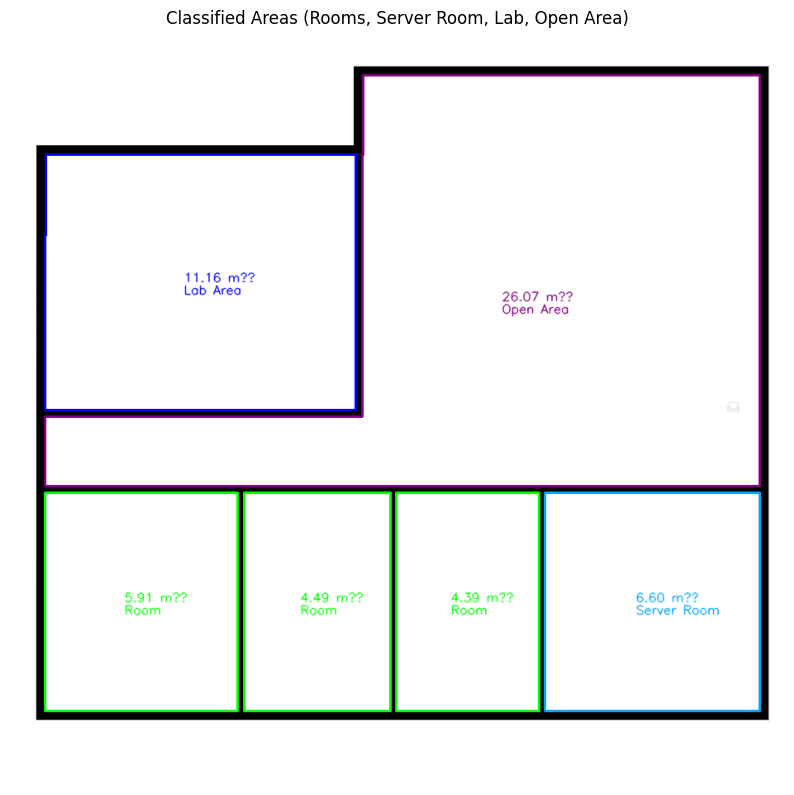

Room 1: 6.60 m² → Server Room
Room 2: 4.39 m² → Room
Room 3: 4.49 m² → Room
Room 4: 5.91 m² → Room
Room 5: 11.16 m² → Lab Area
Room 6: 26.07 m² → Open Area


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "floorplan.png"  # Update with your image path
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Apply morphological closing to close small gaps in walls
kernel = np.ones((5,5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Find contours with hierarchy
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Define scale (1 meter = 50 pixels)
scale_factor = (1 / 102) ** 2  # Convert from pixel area to square meters

# Filter out only inner room contours (ignore the outermost boundary)
room_contours = [cnt for i, cnt in enumerate(contours) if hierarchy[0][i][3] != -1]

# Create a copy to draw on
image_with_rooms = image.copy()

# Classification and colors
classifications = []
color_map = {
    "Room": (0, 255, 0),  # Green
    "Server Room": (255, 165, 0),  # Orange
    "Lab Area": (255, 0, 0),  # Blue
    "Open Area": (128, 0, 128)  # Purple
}

# Loop through detected rooms, classify, and draw
for i, cnt in enumerate(room_contours):
    area_m2 = cv2.contourArea(cnt) * scale_factor  # Convert to square meters

    # Classification logic
    if 4 <= area_m2 < 6:
        label = "Room"
    elif 6 <= area_m2 < 10:
        label = "Server Room"
    elif 10 <= area_m2 < 15:
        label = "Lab Area"
    else:
        label = "Open Area"

    classifications.append((area_m2, label))

    # Get centroid for labeling
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0

    # Draw contour and label
    cv2.drawContours(image_with_rooms, [cnt], -1, color_map[label], 2)
    cv2.putText(image_with_rooms, f"{area_m2:.2f} m²", (cx - 20, cy),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color_map[label], 1, cv2.LINE_AA)
    cv2.putText(image_with_rooms, label, (cx - 20, cy + 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color_map[label], 1, cv2.LINE_AA)

# Display the final result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_rooms, cv2.COLOR_BGR2RGB))
plt.title("Classified Areas (Rooms, Server Room, Lab, Open Area)")
plt.axis("off")
plt.show()

# Print classification results
for i, (area, category) in enumerate(classifications):
    print(f"Room {i+1}: {area:.2f} m² → {category}")

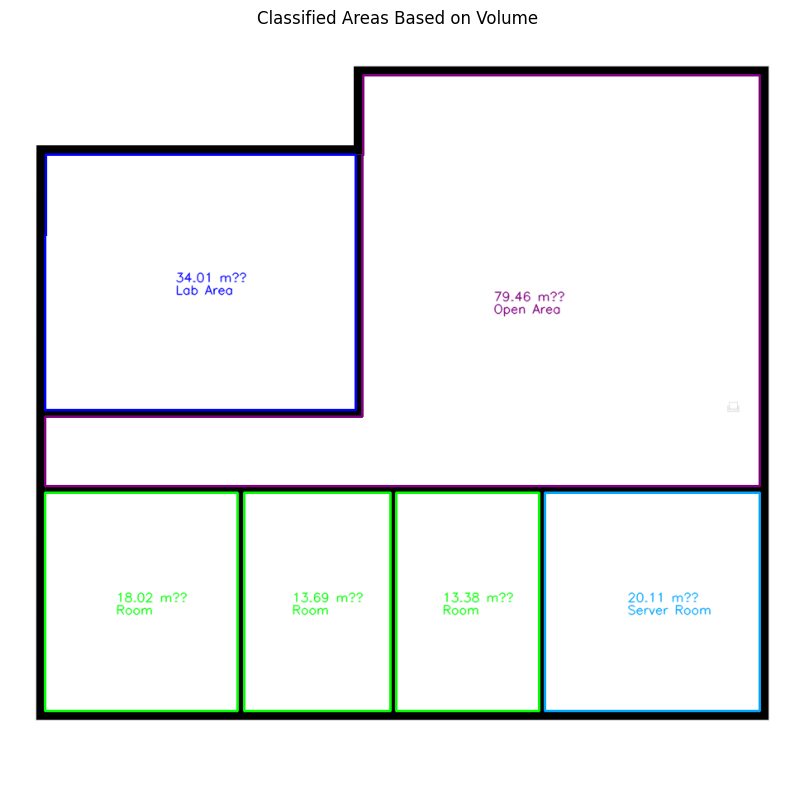

Room 1: 6.60 m² → 20.11 m³ → Server Room
Room 2: 4.39 m² → 13.38 m³ → Room
Room 3: 4.49 m² → 13.69 m³ → Room
Room 4: 5.91 m² → 18.02 m³ → Room
Room 5: 11.16 m² → 34.01 m³ → Lab Area
Room 6: 26.07 m² → 79.46 m³ → Open Area


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "floorplan.png"  # Update with your image path
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Apply morphological closing to close small gaps in walls
kernel = np.ones((5,5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Find contours with hierarchy
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Define scale (1 meter = 50 pixels)
scale_factor = (1 / 102) ** 2  # Convert from pixel area to square meters

# Room height assumption
room_height = 3.048  # meters

# Filter out only inner room contours (ignore the outermost boundary)
room_contours = [cnt for i, cnt in enumerate(contours) if hierarchy[0][i][3] != -1]

# Create a copy to draw on
image_with_rooms = image.copy()

# Classification and colors
classifications = []
color_map = {
    "Room": (0, 255, 0),  # Green
    "Server Room": (255, 165, 0),  # Orange
    "Lab Area": (255, 0, 0),  # Blue
    "Open Area": (128, 0, 128)  # Purple
}

# Loop through detected rooms, classify based on volume, and draw
for i, cnt in enumerate(room_contours):
    area_m2 = cv2.contourArea(cnt) * scale_factor  # Convert to square meters
    volume_m3 = area_m2 * room_height  # Calculate volume

    # Classification logic based on volume
    if 12 <= volume_m3 < 18.5:
        label = "Room"
    elif 18.5<= volume_m3 < 30:
        label = "Server Room"
    elif 30 <= volume_m3 < 45:
        label = "Lab Area"
    else:
        label = "Open Area"

    classifications.append((area_m2, volume_m3, label))

    # Get centroid for labeling
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0

    # Draw contour and label
    cv2.drawContours(image_with_rooms, [cnt], -1, color_map[label], 2)
    cv2.putText(image_with_rooms, f"{volume_m3:.2f} m³", (cx - 30, cy),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color_map[label], 1, cv2.LINE_AA)
    cv2.putText(image_with_rooms, label, (cx - 30, cy + 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color_map[label], 1, cv2.LINE_AA)

# Display the final result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_rooms, cv2.COLOR_BGR2RGB))
plt.title("Classified Areas Based on Volume")
plt.axis("off")
plt.show()

# Print classification results
for i, (area, volume, category) in enumerate(classifications):
    print(f"Room {i+1}: {area:.2f} m² → {volume:.2f} m³ → {category}")

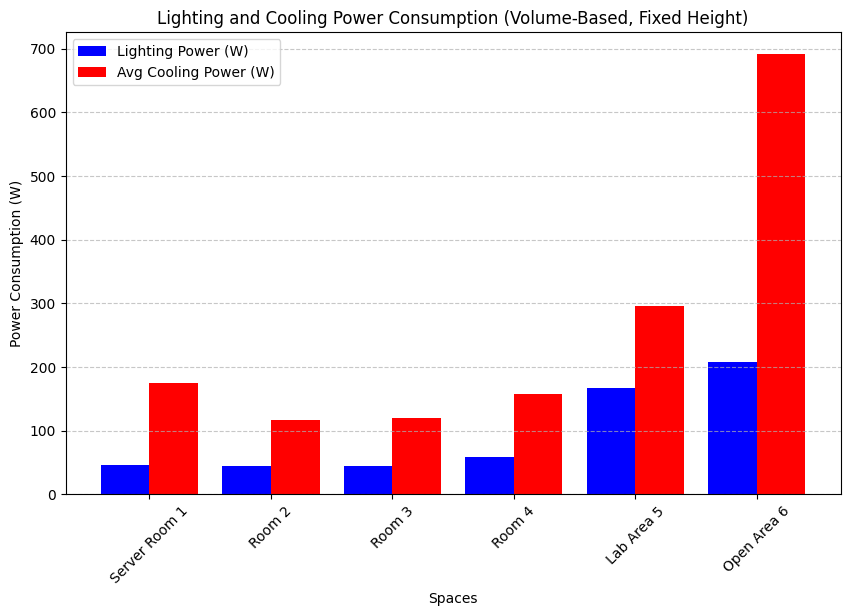


Detected Spaces and Their Power Consumption (Volume-Based, Fixed Height = 3.048m):
------------------------------------------------
Server Room 1:
  - Area: 6.60 m²
  - Volume: 20.11 m³
  - Lighting Power: 46.18 W
  - Avg Cooling Power: 174.94 W
------------------------------------------------
Room 2:
  - Area: 4.39 m²
  - Volume: 13.38 m³
  - Lighting Power: 43.90 W
  - Avg Cooling Power: 116.40 W
------------------------------------------------
Room 3:
  - Area: 4.49 m²
  - Volume: 13.69 m³
  - Lighting Power: 44.91 W
  - Avg Cooling Power: 119.09 W
------------------------------------------------
Room 4:
  - Area: 5.91 m²
  - Volume: 18.02 m³
  - Lighting Power: 59.12 W
  - Avg Cooling Power: 156.78 W
------------------------------------------------
Lab Area 5:
  - Area: 11.16 m²
  - Volume: 34.01 m³
  - Lighting Power: 167.37 W
  - Avg Cooling Power: 295.87 W
------------------------------------------------
Open Area 6:
  - Area: 26.07 m²
  - Volume: 79.46 m³
  - Lighting Power: 2

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants
SCALE_PIXELS_PER_METER = 102  # 1 meter = 50 pixels
FIXED_HEIGHT = 3.048  # Fixed height for all spaces (meters)

# Lighting Power Density (Watts per cubic meter) for different space types
LIGHTING_REQUIREMENTS = {
    "Room": 10 / FIXED_HEIGHT,  # 10 W/m² ÷ height
    "Server Room": 7 / FIXED_HEIGHT,  # 7 W/m² ÷ height
    "Lab Area": 15 / FIXED_HEIGHT,  # 15 W/m² ÷ height
    "Open Area": 8 / FIXED_HEIGHT  # Assumed lower lighting requirement
}

# Cooling Energy Assumptions (W/m³ per °C difference)
COOLING_FACTOR = 1.5  # Cooling energy per m³ per °C

INSIDE_TEMP = 24  # Target indoor temperature (°C)
OUTSIDE_TEMPS = [25, 27, 30, 32, 35]  # Hourly outside temperature readings

# Function to convert pixel area to square meters
def convert_pixel_area_to_m2(pixel_area):
    return pixel_area / (SCALE_PIXELS_PER_METER ** 2)

# Function to calculate volume (m³)
def calculate_volume(area_m2):
    return area_m2 * FIXED_HEIGHT

# Function to calculate lighting power (W) based on volume
def calculate_lighting_power(volume_m3, space_type):
    return volume_m3 * LIGHTING_REQUIREMENTS.get(space_type, 8 / FIXED_HEIGHT)

# Function to calculate average cooling power (W) based on volume
def calculate_avg_cooling_power(volume_m3):
    total_cooling_power = 0
    for outside_temp in OUTSIDE_TEMPS:
        temp_diff = max(outside_temp - INSIDE_TEMP, 0)
        total_cooling_power += volume_m3 * temp_diff * COOLING_FACTOR

    avg_cooling_power = total_cooling_power / len(OUTSIDE_TEMPS)  # Average cooling power (W)
    return avg_cooling_power

# Load and preprocess the floor plan image
image = cv2.imread("floorplan.png", cv2.IMREAD_GRAYSCALE)

# Convert to binary (black & white)
_, binary_image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

# Apply morphological operations to remove noise
kernel = np.ones((5, 5), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Detect contours (Walls and Rooms)
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out only inner room contours (ignore the outermost boundary)
room_contours = [cnt for i, cnt in enumerate(contours) if hierarchy[0][i][3] != -1]

# Classification and processing of detected spaces
detected_spaces = []
for i, cnt in enumerate(room_contours):
    area_pixels = cv2.contourArea(cnt)
    area_m2 = convert_pixel_area_to_m2(area_pixels)
    volume_m3 = calculate_volume(area_m2)  # Fixed height applied

    # Classify based on volume
    if 12 <= volume_m3 < 18.5:
        space_type = "Room"
    elif 18.5 <= volume_m3 < 30:
        space_type = "Server Room"
    elif 30 <= volume_m3 < 45:
        space_type = "Lab Area"
    else:
        space_type = "Open Area"

    lighting_power = calculate_lighting_power(volume_m3, space_type)  # Lighting power (W)
    avg_cooling_power = calculate_avg_cooling_power(volume_m3)  # Cooling power (W)

    detected_spaces.append({
        "label": f"{space_type} {i+1}",
        "area_m2": area_m2,
        "volume_m3": volume_m3,
        "lighting_power": lighting_power,
        "avg_cooling_power": avg_cooling_power
    })

# Plot power consumption graph
labels = [space["label"] for space in detected_spaces]
lighting_values = [space["lighting_power"] for space in detected_spaces]
cooling_values = [space["avg_cooling_power"] for space in detected_spaces]

x = np.arange(len(detected_spaces))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, lighting_values, width=0.4, label="Lighting Power (W)", color='blue')
plt.bar(x + 0.2, cooling_values, width=0.4, label="Avg Cooling Power (W)", color='red')

plt.xlabel("Spaces")
plt.ylabel("Power Consumption (W)")
plt.title("Lighting and Cooling Power Consumption (Volume-Based, Fixed Height)")
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print results
print("\nDetected Spaces and Their Power Consumption (Volume-Based, Fixed Height = 3.048m):")
print("------------------------------------------------")
for space in detected_spaces:
    print(f"{space['label']}:")
    print(f"  - Area: {space['area_m2']:.2f} m²")
    print(f"  - Volume: {space['volume_m3']:.2f} m³")
    print(f"  - Lighting Power: {space['lighting_power']:.2f} W")
    print(f"  - Avg Cooling Power: {space['avg_cooling_power']:.2f} W")
    print("------------------------------------------------")


Detected Spaces and Their Power Consumption (Time-Based, Fixed Height = 3.048m):
------------------------------------------------
Server Room 1:
  - Area: 6.60 m²
  - Volume: 20.11 m³
  - Lighting Power: 46.18 W
  - Total Cooling Power (7:30 AM - 6 PM): 1990.74 W
------------------------------------------------
Room 2:
  - Area: 4.39 m²
  - Volume: 13.38 m³
  - Lighting Power: 43.90 W
  - Total Cooling Power (7:30 AM - 6 PM): 1324.59 W
------------------------------------------------
Room 3:
  - Area: 4.49 m²
  - Volume: 13.69 m³
  - Lighting Power: 44.91 W
  - Total Cooling Power (7:30 AM - 6 PM): 1355.22 W
------------------------------------------------
Room 4:
  - Area: 5.91 m²
  - Volume: 18.02 m³
  - Lighting Power: 59.12 W
  - Total Cooling Power (7:30 AM - 6 PM): 1784.00 W
------------------------------------------------
Lab Area 5:
  - Area: 11.16 m²
  - Volume: 34.01 m³
  - Lighting Power: 167.37 W
  - Total Cooling Power (7:30 AM - 6 PM): 3366.85 W
-------------------------

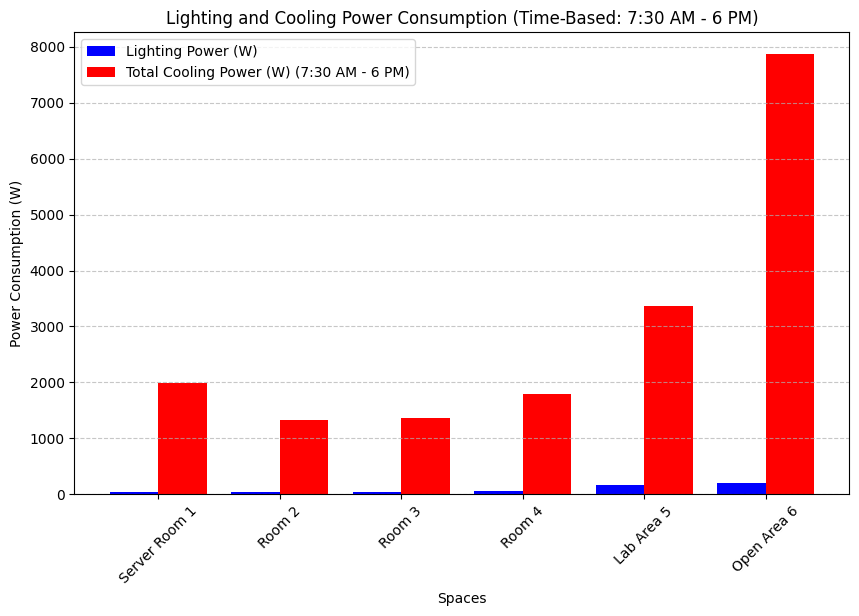

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants
SCALE_PIXELS_PER_METER = 102  # 1 meter = 102 pixels
FIXED_HEIGHT = 3.048  # Fixed height for all spaces (meters)

# Lighting Power Density (Watts per cubic meter)
LIGHTING_REQUIREMENTS = {
    "Room": 10 / FIXED_HEIGHT,
    "Server Room": 7 / FIXED_HEIGHT,
    "Lab Area": 15 / FIXED_HEIGHT,
    "Open Area": 8 / FIXED_HEIGHT
}

# Cooling Energy Assumptions (W/m³ per °C difference)
COOLING_FACTOR = 1.5
INSIDE_TEMP = 24
HOURS = list(range(7, 19))  # 7:30 AM to 6:00 PM
HOURLY_OUTSIDE_TEMPS = [25, 26, 28, 30, 32, 34, 35, 33, 30, 28, 27, 26]

# Function to convert pixel area to square meters
def convert_pixel_area_to_m2(pixel_area):
    return pixel_area / (SCALE_PIXELS_PER_METER ** 2)

# Function to calculate volume (m³)
def calculate_volume(area_m2):
    return area_m2 * FIXED_HEIGHT

# Function to calculate lighting power (W)
def calculate_lighting_power(volume_m3, space_type):
    return volume_m3 * LIGHTING_REQUIREMENTS.get(space_type, 8 / FIXED_HEIGHT)

# Function to calculate total cooling power (W) over the operational hours
def calculate_total_cooling_power(volume_m3):
    total_cooling_power = 0
    for outside_temp in HOURLY_OUTSIDE_TEMPS:
        temp_diff = max(outside_temp - INSIDE_TEMP, 0)
        hourly_cooling = volume_m3 * temp_diff * COOLING_FACTOR
        total_cooling_power += hourly_cooling

    return total_cooling_power

# Load and preprocess the floor plan image
image = cv2.imread("floorplan.png", cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5, 5), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Detect contours
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
room_contours = [cnt for i, cnt in enumerate(contours) if hierarchy[0][i][3] != -1]

# Classification and processing of detected spaces
detected_spaces = []
for i, cnt in enumerate(room_contours):
    area_pixels = cv2.contourArea(cnt)
    area_m2 = convert_pixel_area_to_m2(area_pixels)
    volume_m3 = calculate_volume(area_m2)

    # Classify based on volume
    if 12 <= volume_m3 < 18.5:
        space_type = "Room"
    elif 18.5 <= volume_m3 < 30:
        space_type = "Server Room"
    elif 30 <= volume_m3 < 45:
        space_type = "Lab Area"
    else:
        space_type = "Open Area"

    lighting_power = calculate_lighting_power(volume_m3, space_type)
    total_cooling_power = calculate_total_cooling_power(volume_m3)

    detected_spaces.append({
        "label": f"{space_type} {i+1}",
        "area_m2": area_m2,
        "volume_m3": volume_m3,
        "lighting_power": lighting_power,
        "total_cooling_power": total_cooling_power
    })

# Print results before plotting to ensure text output appears first
print("\nDetected Spaces and Their Power Consumption (Time-Based, Fixed Height = 3.048m):")
print("------------------------------------------------")
for space in detected_spaces:
    print(f"{space['label']}:")
    print(f"  - Area: {space['area_m2']:.2f} m²")
    print(f"  - Volume: {space['volume_m3']:.2f} m³")
    print(f"  - Lighting Power: {space['lighting_power']:.2f} W")
    print(f"  - Total Cooling Power (7:30 AM - 6 PM): {space['total_cooling_power']:.2f} W")
    print("------------------------------------------------")

# Plot power consumption graph
labels = [space["label"] for space in detected_spaces]
lighting_values = [space["lighting_power"] for space in detected_spaces]
cooling_values = [space["total_cooling_power"] for space in detected_spaces]

x = np.arange(len(detected_spaces))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, lighting_values, width=0.4, label="Lighting Power (W)", color='blue')
plt.bar(x + 0.2, cooling_values, width=0.4, label="Total Cooling Power (W) (7:30 AM - 6 PM)", color='red')

plt.xlabel("Spaces")
plt.ylabel("Power Consumption (W)")
plt.title("Lighting and Cooling Power Consumption (Time-Based: 7:30 AM - 6 PM)")
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.pause(0.1)  # Ensure text appears before graph
plt.show()
plt.close()  # Close the plot to prevent blocking execution


Detected Spaces and Their Energy Consumption (Time-Based: 7:30 AM - 6 PM)
------------------------------------------------
Server Room 1:
  - Area: 6.60 m²
  - Volume: 20.11 m³
  - Lighting Power: 46.18 W
  - Lighting Energy (7:30 AM - 6 PM): 484.90 Wh
  - Total Cooling Power: 1990.74 W
  - Total Cooling Energy (7:30 AM - 6 PM): 1741.90 Wh
------------------------------------------------
Room 2:
  - Area: 4.39 m²
  - Volume: 13.38 m³
  - Lighting Power: 43.90 W
  - Lighting Energy (7:30 AM - 6 PM): 460.91 Wh
  - Total Cooling Power: 1324.59 W
  - Total Cooling Energy (7:30 AM - 6 PM): 1159.01 Wh
------------------------------------------------
Room 3:
  - Area: 4.49 m²
  - Volume: 13.69 m³
  - Lighting Power: 44.91 W
  - Lighting Energy (7:30 AM - 6 PM): 471.57 Wh
  - Total Cooling Power: 1355.22 W
  - Total Cooling Energy (7:30 AM - 6 PM): 1185.81 Wh
------------------------------------------------
Room 4:
  - Area: 5.91 m²
  - Volume: 18.02 m³
  - Lighting Power: 59.12 W
  - Lightin

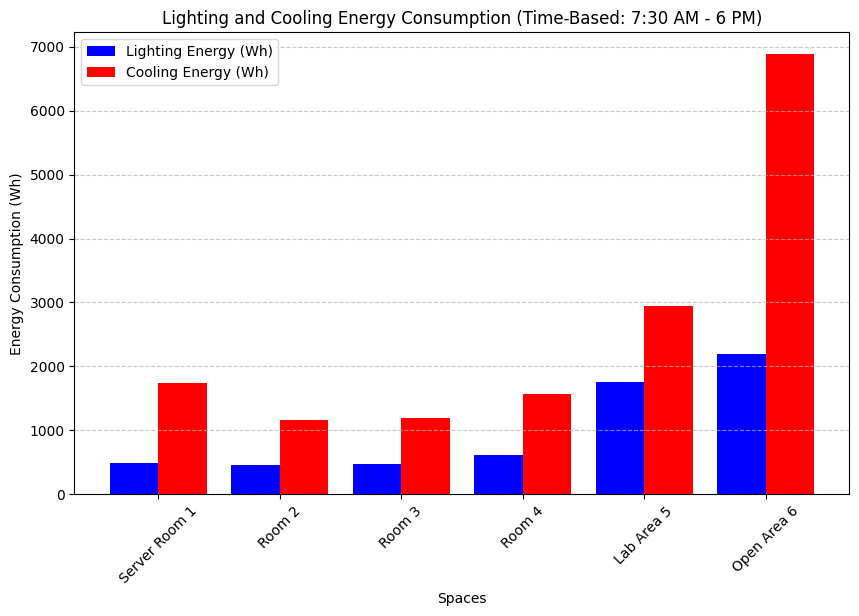

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants
SCALE_PIXELS_PER_METER = 102
FIXED_HEIGHT = 3.048  # Fixed height for all spaces (meters)

# Lighting Power Density (Watts per cubic meter)
LIGHTING_REQUIREMENTS = {
    "Room": 10 / FIXED_HEIGHT,
    "Server Room": 7 / FIXED_HEIGHT,
    "Lab Area": 15 / FIXED_HEIGHT,
    "Open Area": 8 / FIXED_HEIGHT
}

# Cooling Energy Assumptions (W/m³ per °C difference)
COOLING_FACTOR = 1.5
INSIDE_TEMP = 24
HOURS = 10.5  # 7:30 AM to 6:00 PM = 10.5 hours
HOURLY_OUTSIDE_TEMPS = [25, 26, 28, 30, 32, 34, 35, 33, 30, 28, 27, 26]

# Function to convert pixel area to square meters
def convert_pixel_area_to_m2(pixel_area):
    return pixel_area / (SCALE_PIXELS_PER_METER ** 2)

# Function to calculate volume (m³)
def calculate_volume(area_m2):
    return area_m2 * FIXED_HEIGHT

# Function to calculate lighting power (W)
def calculate_lighting_power(volume_m3, space_type):
    return volume_m3 * LIGHTING_REQUIREMENTS.get(space_type, 8 / FIXED_HEIGHT)

# Function to calculate total cooling power (W) over the operational hours
def calculate_total_cooling_power(volume_m3):
    total_cooling_power = 0
    for outside_temp in HOURLY_OUTSIDE_TEMPS:
        temp_diff = max(outside_temp - INSIDE_TEMP, 0)
        hourly_cooling = volume_m3 * temp_diff * COOLING_FACTOR
        total_cooling_power += hourly_cooling

    return total_cooling_power

# Load and preprocess the floor plan image
image = cv2.imread("floorplan.png", cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5, 5), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Detect contours
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
room_contours = [cnt for i, cnt in enumerate(contours) if hierarchy[0][i][3] != -1]

# Classification and processing of detected spaces
detected_spaces = []
for i, cnt in enumerate(room_contours):
    area_pixels = cv2.contourArea(cnt)
    area_m2 = convert_pixel_area_to_m2(area_pixels)
    volume_m3 = calculate_volume(area_m2)

    # Classify based on volume
    if 12 <= volume_m3 < 18.5:
        space_type = "Room"
    elif 18.5 <= volume_m3 < 30:
        space_type = "Server Room"
    elif 30 <= volume_m3 < 45:
        space_type = "Lab Area"
    else:
        space_type = "Open Area"

    lighting_power = calculate_lighting_power(volume_m3, space_type)  # Lighting Power (W)
    total_cooling_power = calculate_total_cooling_power(volume_m3)  # Cooling Power (W)

    # **Convert to Energy Consumption (Watt-Hours)**
    lighting_energy = lighting_power * HOURS  # Lighting for 10.5 hours
    cooling_energy = total_cooling_power * (HOURS / len(HOURLY_OUTSIDE_TEMPS))  # Avg cooling per hour

    detected_spaces.append({
        "label": f"{space_type} {i+1}",
        "area_m2": area_m2,
        "volume_m3": volume_m3,
        "lighting_power": lighting_power,
        "lighting_energy": lighting_energy,
        "cooling_power": total_cooling_power,
        "cooling_energy": cooling_energy
    })

# Print results before plotting to ensure text output appears first
print("\nDetected Spaces and Their Energy Consumption (Time-Based: 7:30 AM - 6 PM)")
print("------------------------------------------------")
for space in detected_spaces:
    print(f"{space['label']}:")
    print(f"  - Area: {space['area_m2']:.2f} m²")
    print(f"  - Volume: {space['volume_m3']:.2f} m³")
    print(f"  - Lighting Power: {space['lighting_power']:.2f} W")
    print(f"  - Lighting Energy (7:30 AM - 6 PM): {space['lighting_energy']:.2f} Wh")
    print(f"  - Total Cooling Power: {space['cooling_power']:.2f} W")
    print(f"  - Total Cooling Energy (7:30 AM - 6 PM): {space['cooling_energy']:.2f} Wh")
    print("------------------------------------------------")

# Plot energy consumption graph
labels = [space["label"] for space in detected_spaces]
lighting_values = [space["lighting_energy"] for space in detected_spaces]
cooling_values = [space["cooling_energy"] for space in detected_spaces]

x = np.arange(len(detected_spaces))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, lighting_values, width=0.4, label="Lighting Energy (Wh)", color='blue')
plt.bar(x + 0.2, cooling_values, width=0.4, label="Cooling Energy (Wh)", color='red')

plt.xlabel("Spaces")
plt.ylabel("Energy Consumption (Wh)")
plt.title("Lighting and Cooling Energy Consumption (Time-Based: 7:30 AM - 6 PM)")
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.pause(0.1)  # Ensure text appears before graph
plt.show()
plt.close()  # Close the plot to free up memory

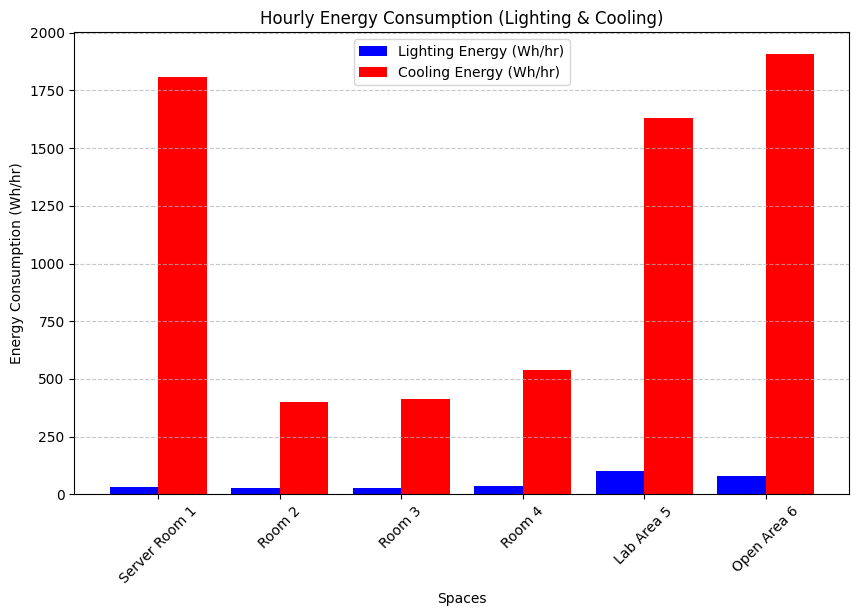


Detected Spaces and Their Energy Consumption:
------------------------------------------------
Server Room 1:
  - Area: 6.60 m²
  - Volume: 20.11 m³
  - Lighting Energy per Hour: 30.16 Wh
  - Total Lighting Energy (10.5 hrs): 316.71 Wh
  - Cooling Energy per Hour: 1809.76 Wh
  - Total Cooling Energy (10.5 hrs): 19002.51 Wh
------------------------------------------------
Room 2:
  - Area: 4.39 m²
  - Volume: 13.38 m³
  - Lighting Energy per Hour: 26.76 Wh
  - Total Lighting Energy (10.5 hrs): 280.97 Wh
  - Cooling Energy per Hour: 401.39 Wh
  - Total Cooling Energy (10.5 hrs): 4214.60 Wh
------------------------------------------------
Room 3:
  - Area: 4.49 m²
  - Volume: 13.69 m³
  - Lighting Energy per Hour: 27.38 Wh
  - Total Lighting Energy (10.5 hrs): 287.47 Wh
  - Cooling Energy per Hour: 410.67 Wh
  - Total Cooling Energy (10.5 hrs): 4312.05 Wh
------------------------------------------------
Room 4:
  - Area: 5.91 m²
  - Volume: 18.02 m³
  - Lighting Energy per Hour: 36.04 Wh

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants
SCALE_PIXELS_PER_METER = 102  # Scale conversion
HEIGHT = 3.048  # Room height in meters
WORKING_HOURS = 10.5  # From 7:30 AM to 6 PM
INSIDE_TEMP = 24  # Indoor target temp (°C)
OUTSIDE_TEMP = 30  # Average outside temp during work hours
TEMP_DIFF = max(OUTSIDE_TEMP - INSIDE_TEMP, 0)  # Temperature difference

# Room classification and power densities
def classify_room(area_m2):
    if 4 <= area_m2 <= 6:
        return "Room", 2, 5  # Lighting: 2 W/m³, Cooling: 5 W/m³ per °C
    elif 6 < area_m2 <= 10:
        return "Server Room", 1.5, 15  # Lighting: 1.5 W/m³, Cooling: 15 W/m³ per °C
    elif 10 < area_m2 <= 15:
        return "Lab Area", 3, 8  # Lighting: 3 W/m³, Cooling: 8 W/m³ per °C
    else:
        return "Open Area", 1, 4  # Lighting: 1 W/m³, Cooling: 4 W/m³ per °C

# Load floor plan and preprocess
image_path = "floorplan.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Detect contours (rooms)
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
room_contours = [cnt for i, cnt in enumerate(contours) if hierarchy[0][i][3] != -1]

# Store detected room data
detected_spaces = []

for i, cnt in enumerate(room_contours):
    area_m2 = cv2.contourArea(cnt) * (1 / SCALE_PIXELS_PER_METER) ** 2
    volume_m3 = area_m2 * HEIGHT  # Calculate volume

    room_type, lighting_wm3, cooling_wm3 = classify_room(area_m2)

    # Calculate power consumption
    lighting_power = lighting_wm3 * volume_m3  # Watts
    cooling_power = cooling_wm3 * volume_m3 * TEMP_DIFF  # Watts

    # Convert to energy (Wh)
    lighting_energy_hourly = lighting_power
    lighting_energy_total = lighting_energy_hourly * WORKING_HOURS

    cooling_energy_hourly = cooling_power
    cooling_energy_total = cooling_energy_hourly * WORKING_HOURS

    detected_spaces.append({
        "label": f"{room_type} {i+1}",
        "area_m2": area_m2,
        "volume_m3": volume_m3,
        "lighting_energy_hourly": lighting_energy_hourly,
        "lighting_energy_total": lighting_energy_total,
        "cooling_energy_hourly": cooling_energy_hourly,
        "cooling_energy_total": cooling_energy_total
    })

# Plot power consumption per hour
labels = [space["label"] for space in detected_spaces]
lighting_values = [space["lighting_energy_hourly"] for space in detected_spaces]
cooling_values = [space["cooling_energy_hourly"] for space in detected_spaces]

x = np.arange(len(detected_spaces))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, lighting_values, width=0.4, label="Lighting Energy (Wh/hr)", color='blue')
plt.bar(x + 0.2, cooling_values, width=0.4, label="Cooling Energy (Wh/hr)", color='red')

plt.xlabel("Spaces")
plt.ylabel("Energy Consumption (Wh/hr)")
plt.title("Hourly Energy Consumption (Lighting & Cooling)")
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print results
print("\nDetected Spaces and Their Energy Consumption:")
print("------------------------------------------------")
for space in detected_spaces:
    print(f"{space['label']}:")
    print(f"  - Area: {space['area_m2']:.2f} m²")
    print(f"  - Volume: {space['volume_m3']:.2f} m³")
    print(f"  - Lighting Energy per Hour: {space['lighting_energy_hourly']:.2f} Wh")
    print(f"  - Total Lighting Energy (10.5 hrs): {space['lighting_energy_total']:.2f} Wh")
    print(f"  - Cooling Energy per Hour: {space['cooling_energy_hourly']:.2f} Wh")
    print(f"  - Total Cooling Energy (10.5 hrs): {space['cooling_energy_total']:.2f} Wh")
    print("------------------------------------------------")